# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

# 1

## 1
Prove that $vec\left(AXB\right) = \left(B^T \otimes A\right) vec\left(X\right)$

Let $A$ be $n \times m$ matrix, $X$ be $m \times p$ $B$ be $p \times l$ matrices. We shall consider $k-th$ column of $AXB$

Let $XB = G$, then 
$$
g_{ij} = \sum\limits_{\alpha=1}^p x_{i \alpha} b_{\alpha j}\\
(AG)_{ij} = \sum\limits_{\alpha=1}^m a_{i \alpha}g_{\alpha j}\\
(AG)_{:, k}= \begin{pmatrix}
\sum a_{1i}g_{ik}\\
\vdots\\
\sum a_{ni}g_{ik}
\end{pmatrix} = AG_{:,k} = A \begin{pmatrix}
\sum x_{1i}b_{ik}\\
\vdots\\
\sum x_{mi}b_{ik}
\end{pmatrix} = A \left(\begin{pmatrix}
x_{11}\\
\vdots\\
x_{m1}
\end{pmatrix}b_{1k} + \ldots + \begin{pmatrix}
x_{1p}\\
\vdots\\
x_{mp}
\end{pmatrix}b_{pk} \right) = \begin{pmatrix}
b_{1k}A & \ldots & b_{pk} A
\end{pmatrix} vec(X) = \left(\begin{pmatrix}
b_{1k} & \ldots & b_{pk}
\end{pmatrix} \otimes A\right) vec(X) = \left(b_k^T \otimes A \right) vec(X)
$$
Thus, if we stack column-wise
$$
vec(AXB) = \left(B^T \otimes A\right) vec(X)
$$

If we want to perform vectorization in row order, then we simply do transpositions
$$
vec(\left(AXB\right)^T) = vec(B^T X^T A^T) = \left(A \otimes B^T\right) vec(X^T)
$$
where $vec(X^T)$ is row-order vectorization of $X$


## 2
Let $A$ be $n \times m$ matrix, $B$ be $p \times q$, then $x$ must be $mq$-vector. $(A \otimes B)$ requires $O(npmq)$ operations, so does the multiplication $(A \otimes B)x$.

We can use results of previous exercise, i.e. consider $X$ be reshaped matrix $q \times m$ version of $x$. Then we get
$$
(A \otimes B) x = (A \otimes B) vec(X) = vec(BXA^T)
$$
The last matmul requires $O(mnq)$ for $XA^T$ and $O(pqn)$ for $BXA^T$ computations. Vectorization will take additional $O(np)$ operations. So in total $O(pqn + mnq)$, it's more efficient than straighforward version above.


## 3

We shall use some properties of kronecker product. Here they are
$$
(A\otimes B)(C\otimes D) = AC \otimes BD\\
(A^{-1} \otimes B^{-1}) = (A\otimes B)^{-1}
$$

Now we proceed with further calculations (considering $A$ be $n \times n$, $B$ be $m \times m$)
$$
A \otimes I + I \otimes B = S_A \Lambda_A S_A^{-1} \otimes I + I \otimes S_B \Lambda_B S_B^{-1} = S_A \Lambda_A S_A^{-1} \otimes S_B S_B^{-1} + S_A S_A^{-1} \otimes S_B \Lambda_B S_B^{-1} = \\
= (S_A \Lambda_A \otimes S_B)(S_A^{-1} \otimes S_B^{-1}) + (S_A \otimes S_B\Lambda_B)(S_A^{-1} \otimes S_B^{-1}) = \left| S_A \otimes S_B = \hat{S} \right| = \\
(S_A \Lambda_A \otimes S_B I + S_A I \otimes S_B\Lambda_B)\hat{S}^{-1} = \hat{S}(\Lambda_A\otimes I)\hat{S}^{-1} + \hat{S}(I\otimes \Lambda_B)\hat{S}^{-1} = \\
= \hat{S} (\Lambda_A \otimes I +  I \otimes \Lambda_B)\hat{S}^{-1} = \hat{S} \Lambda \hat{S}^{-1}
$$
The last line gives as the eigendecomposition of $A \otimes I + I \otimes B$, eigenvectors are columns of $\hat{S}$, eigenvalues are 
$$
\Lambda = \begin{pmatrix}
\lambda_{A1}I + \Lambda_B & 0 & \ldots\\
\vdots & \ddots & \vdots\\
\ldots & 0 & \lambda_{An}I + \Lambda_B
\end{pmatrix}\\
\lambda_{ij} = \lambda_{Ai} + \lambda_{Bj}, \ i = \overline{1, n}, \ j = \overline{1, m}
$$

# 4
We have $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. 

__Richardson__

For Richardson iteration we have the following formula:
$$
Ax = f\\
x_{k+1} = x_k - \tau (Ax_k - f)\\
x_{k+1} = (I - \tau A)x_k + \tau f
$$

If $x^{*}$ is solution, then error on step $k$ is $e_k = x_k - x^{*}$
$$
e_{k+1} = e_k - \tau Ae_k = (I - \tau A)e_k
$$

So iterations converge if $\| I - \tau A\|_2 < 1$. What is optimal $\tau$?

Let $\lambda_1 \leq \ldots \leq \lambda_n$ be eigenvalues of $A$. Then eigenvalues of $(I - \tau A)$ are $1 - \tau \lambda_1, \ldots, 1 - \tau \lambda_n$. Considering symmetric matrix $A$, we can obtain 
$$
\|I - \tau A\|_2 = \underset{i}{\max} |1 - \tau \lambda_i| = \max{(|1 - \tau \lambda_1|, |1 - \tau \lambda_n|)}
$$

One of the entries under absolutes is negative, thus the optimal $\tau$ can be found from
$$
\tau \lambda_1 - 1 = 1 - \tau \lambda_n\\
\tau = \dfrac{2}{\lambda_1 + \lambda_n}
$$

In the case of our matrix $A$ we have $\lambda_1 = 0.001, \ \lambda_n = 1000$, so $\tau = \dfrac{2}{0.001 + 1000}$. What about convergence?

Considering the solution $x^{*}$ and the value of $x_t$ at step $t$
$$
x^{*} - x_t = (I - \tau A)x^{*} + \tau f - (I - \tau A) x_{t-1} + \tau f= (I - \tau A)(x^{*} - x_{t-1}) = \ldots \\
= (I - \tau A)^t (x^{*} - x_0) = (I - \tau A)^t x^{*}
$$
Thus the 2-norm is
$$
\| x^{*} - x_t\|_2 = \|(I - \tau A)^t x^{*}\|_2 \leq \|I - \tau A\|_2 \|x^{*}\|_2 = \\
= (1 - \dfrac{2\lambda_1}{\lambda_1 + \lambda_n})^t \|x^{*}\|_2 = \varepsilon \|x^{*}\|_2\\
\varepsilon = \left(1 - \dfrac{2\lambda_1}{\lambda_1 + \lambda_n}\right)^t \to \\
\ln{\varepsilon} = t \ln{\left(1 - \dfrac{2\lambda_1}{\lambda_1 + \lambda_n}\right)} \to\\
t \approx \dfrac{\lambda_1 + \lambda_n}{2\lambda_1} \ln{\left(1 / \varepsilon\right)}
$$

Thus for matrix $A:$ $t = 4 \ln{10} (5 \times 10^5 + 0.5) \approx 4605175 \approx 4.6 \times 10^6$ iterations

__Chebyshev__

For error $e_{k+1}$:
$$
e_{k+1} = (I-\tau_k A)\ldots (I - \tau_0 A) e_0 = p(A) e_0\\
\|e_{k+1}\|_2 \leq \|p(A)\|_2 \|e_0\|_2
$$
Next (without proof)
$$
\tau_i = \dfrac{2}{\lambda_{max} + \lambda_{min} - (\lambda_{max} - \lambda_{min})x_i}, \ x_i = \cos{\dfrac{\pi(2i+1)}{2n}}, \ i=\overline{0, n-1}\\
e_{k+1} \leq C q^k e_0, \ q = \dfrac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1}\\
e_{k+1} = x^{*} - x_{k+1}, \ e_0 = x^{*} - x_0 = x^{*}
$$

In the case of matrix $A$:$ \ cond(A) = \|A\|_2 \|A^{-1}\|_2 = 10^3 \times 10^3 = 10^6$, and 
$$
\dfrac{\|x^{*} - x_{k+1}\|_2}{\|x^{*}\|_2} \leq C q^k \leq \varepsilon\\
k \leq \dfrac{1}{\ln{q}} \cdot \ln{\dfrac{\varepsilon}{C}} = \left| \text{assume } C = 1\right| = (-4) \left(\ln{\dfrac{10^3 - 1}{10^3 + 1}}\right)^{-1} \ln 10 \approx 4605
$$


__Conjugate gradient__

Let's use the relative error formula from lectures:
$$
\dfrac{\|x^{*} - x_{k+1}\|_A}{\|x^{*}\|_A} \leq \gamma \left(\dfrac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1} \right)^k = \gamma q^k \leq \varepsilon
$$

In our case (let $\gamma=1$)
$$
q^k \leq \varepsilon \to \ k \leq \dfrac{\ln{\varepsilon}}{\ln{q}} \approx 4605
$$

Now let's perform numerical experiments. Codes for iterative methods are taken from lectures.

In [1]:
# Your solution is here
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def richardson(A, x, x_true, rhs, eps, tau_opt=None):
    """
        
        input: 1d array A (as A in our case is diagonal, then A @ x = A * x, * - elementwise multiplication)
    
    """
    
    if tau_opt is None:
        tau_opt = 2 / (A[0] + A[-1])
        
    res = A * x - rhs
    norm_true = np.linalg.norm(x_true)
    rel_list = [np.linalg.norm(x - x_true) / norm_true]
    while (rel_list[-1] > eps):
        res = A * x - rhs
        x = x - tau_opt * res
        rel_list.append(np.linalg.norm(x - x_true) / norm_true)

    return x, rel_list


def leb_shuffle_2n(n):
    if n==1:
        return np.array([0,], dtype=int)
    else:
        prev = leb_shuffle_2n(n // 2)
        ans = np.zeros(n, dtype=int)
        ans[::2] = prev
        ans[1::2] = n - 1 - prev
        return ans


def chebyshev(A, x, x_true, rhs, eps, num_iters=2**13):
    roots = [np.cos((np.pi * (2 * i + 1)) / (2 * num_iters)) for i in range(int(num_iters))]
    taus = [(A[-1] + A[0] - (A[0] - A[-1]) * r) / 2 for r in roots]
    
    res = A * x - rhs
    norm_true = np.linalg.norm(x_true)
    rel_list = [np.linalg.norm(x - x_true) / norm_true]
    
    good_perm_even = leb_shuffle_2n(int(num_iters))
    
    for i in range(num_iters):
        x = x - res / taus[good_perm_even[i]]
        res = A * x - rhs
        rel_list.append(np.linalg.norm(x - x_true) / norm_true)
        if rel_list[-1] < eps:
            break
    return x, rel_list


def conjugate_grad(A, x, x_true, rhs, eps):
    res = rhs - A * x
    p = res
    
    norm_true = np.linalg.norm(x_true)
    rel_list = [np.linalg.norm(x - x_true) / norm_true]
    
    while rel_list[-1] > eps:
        alpha = res @ res / (p @ (A * p))
        x = x + alpha * p
        res_new = res - alpha * A * p
        
        rel_list.append(np.linalg.norm(x - x_true) / norm_true)
        
        beta = res_new @ res_new / (res @ res)
        res = res_new
        p = res + beta * p
    return x, rel_list

In [9]:
A = np.arange(1, 1001) / 1000
A = np.r_[A, 1000]

f = np.random.randn(len(A))
x_true = f / A

eps = 1e-4

_, rich_err = richardson(A, np.zeros(len(A)), x_true, f, eps=eps)

In [18]:
_, cheb_err = chebyshev(A, np.zeros(len(A)), x_true, f, eps=eps)
_, cg_err = conjugate_grad(A, np.zeros(len(A)), x_true, f, eps=eps)

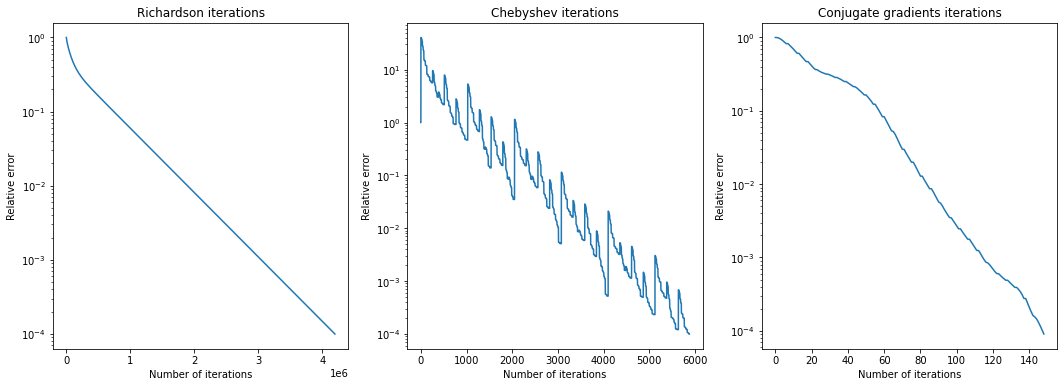

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].plot(np.arange(len(rich_err)), rich_err)
axs[0].set_title('Richardson iterations')

axs[1].plot(np.arange(len(cheb_err)), cheb_err)
axs[1].set_title('Chebyshev iterations')

axs[2].plot(np.arange(len(cg_err)), cg_err)
axs[2].set_title('Conjugate gradients iterations')

for it in axs:
    it.set_xlabel('Number of iterations')
    it.set_ylabel('Relative error')
    it.set_yscale('log')

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

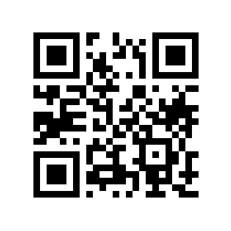

In [5]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [2]:
import scipy.sparse.linalg as spla
import time

In [33]:
def T_matvec(x, alpha):
    assert(len(x.shape) == 1)
    x = x.reshape(np.int(np.sqrt(len(x))), np.int(np.sqrt(len(x))))
    n = x.shape[0]
    
    ij1 = np.exp(-alpha * (np.arange(n))**2)
    ij2 = np.exp(-alpha * (np.arange(1-n, 0))**2)
    T_fft = np.zeros((2*n, 2*n-1))
    
    T_fft[:n, :n] = np.outer(ij1, ij1)
    T_fft[:n, n:] = np.outer(ij1, ij2)
    T_fft[n:, :n] = np.vstack((np.zeros((1, n)), np.outer(ij2, ij1)))
    T_fft[n:, n:] = np.vstack((np.zeros((1, n-1)), np.outer(ij2, ij2)))
    #T_fft = np.c_[T_fft, np.zeros((2*n, 1))]
                             
    T_fft = alpha * np.array(T_fft) / np.pi
    x_pad = np.zeros(T_fft.shape)
    x_pad[:n, :n] = x
    
    y_pad = np.fft.ifft2(np.fft.fft2(T_fft) * np.fft.fft2(x_pad))
    y_out = y_pad[:n, :n].real

    return y_out.reshape(-1)

Let's take a look at matrix $T$
\begin{equation}
T = \begin{pmatrix}
T_0 & T_{-1} & T_{-2} & \ldots & T_{-n}\\
T_1 & T_0 & T_{-1} & \ldots & T_{-(n-1)}\\
\vdots & \vdots &  \vdots &  \ddots & \vdots\\
T_n & T_{n-1} & T_{n-2} & \ldots & T_0
\end{pmatrix}
\end{equation}
Where 
\begin{equation}
T_0 = \begin{pmatrix}
t_{0, 0} & t_{0, -1} & t_{0, -2} & \ldots & t_{0, -n}\\
t_{0, 1} & t_{0, 0} & t_{0, -1} & \ldots & t_{0, -(n-1)}\\
\vdots & \vdots &  \vdots &  \ddots & \vdots\\
t_{0, n} & t_{0, n-1} & t_{0, n-2} & \ldots & t_{0, 0}
\end{pmatrix}
\end{equation}
Using our given kernel it's easy to rewrite $t_{i, k} = \dfrac{\alpha}{\pi}e^{-\alpha(i^2 + k^2)} = \dfrac{\alpha}{\pi}e^{-\alpha i^2} e^{-\alpha k^2}$.

Omitting the factor before exponent (we can multiply the resulting "compressed" expression of $T$ by it later), $t_{i, k} = e_{i} \cdot e_{k}, \ i, j = \overline{-n, n}$.

Then we only need the first column and first row of each matrix:
\begin{equation}
T_{\text{compr}} = \begin{pmatrix}
t_{0, 0} & t_{1, 0} & \ldots & t_{n, 0} & t_{-n, 0} & \ldots & t_{-1, 0} \\
t_{0, 1} & t_{1, 1} & \ldots & t_{n, 1} & t_{-n, 1} & \ldots & t_{-1, 1}\\
\vdots & \vdots &  \ddots &  \vdots &  \vdots & \ddots &  \vdots\\
t_{0, n} & t_{1, n} & \ldots & t_{n, n} & t_{-n, n} & \ldots & t_{-1, n}\\
t_{0, -n} & t_{1, -n} & \ldots & t_{n, -n} & t_{-n, -n} & \ldots & t_{-1, -n}\\
\vdots &  \vdots &  \ddots &  \vdots &  \vdots & \ddots & \vdots\\
t_{0, -1} & t_{1, -1} & \ldots & t_{n, -1} & t_{-n, -1} & \ldots & t_{-1, -1}
\end{pmatrix}
\end{equation}

As $t_{i, k} = e_i \cdot e_k = e_k \cdot e_i$ and by padding additional zeroes between $t_{0, n}$ and $t_{0, -n}$ we can build the compressed $T$ as 
\begin{equation}
T_{\text{compr}} = \begin{pmatrix}
e_0\\
e_1\\
e_n\\
0\\
e_{-n}\\
\vdots\\
e_{-1}
\end{pmatrix} \otimes \begin{pmatrix}
e_0 & e_1 & \ldots & e_n & 0 & e_{-n} & \ldots & e_{-1}
\end{pmatrix}
\end{equation}

In [94]:
def T_matvec(x, alpha):
    assert(len(x.shape) == 1)
    n = np.int(np.sqrt(len(x)))
    x = x.reshape(n, n)
    
    base = np.r_[np.exp(-alpha * np.arange(n)**2), 0, np.exp(-alpha * np.arange(-n+1, 0, 1)**2)]
    T_fft = np.outer(base, base)
    T_fft = alpha * T_fft / np.pi
    
    x_pad = np.zeros(T_fft.shape)
    x_pad[:n, :n] = x
    
    y_pad = np.fft.ifft2(np.fft.fft2(T_fft) * np.fft.fft2(x_pad))
    y_out = y_pad[:n, :n].real
    
    return y_out.reshape(-1)

In [95]:
start = time.perf_counter()
T_matvec(x.reshape(-1), 0.1)
print(time.perf_counter() - start)

0.11084484099956171


**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

Text(0.5, 1.0, 'original QR')

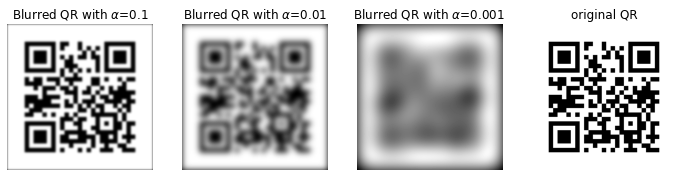

In [96]:
alpha = [0.1, 0.01, 0.001]
outs = []

x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]

for it in alpha:
    T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, it))
    out = T.matvec(x.reshape(-1))
    outs.append(out)
    
fig, axs = plt.subplots(1, len(outs)+1, figsize=(4*len(outs), 5))
for i, it in enumerate(outs):
    axs[i].set_title(r"Blurred QR with $\alpha$={}".format(alpha[i]))
    axs[i].imshow(it.real.reshape(n, n), cmap="gray")
    axs[i].axis("off")  
axs[-1].imshow(x, cmap="gray")
axs[-1].axis("off")
axs[-1].set_title("original QR")

In [97]:
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

In [98]:
def cg_solv(T, y, tol, maxiter=None):
    num_iters = 0
    
    def num_it(xk):
        nonlocal num_iters
        num_iters += 1
        
    x_dec, _ = spla.cg(T, y, tol=tol, callback=num_it, maxiter=maxiter)
    
    return x_dec, num_iters

In [99]:
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
x_vec = x.reshape(-1)

alpha = 0.1
tol= 1e-3

T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
y_out = T.matvec(x_vec)

restored, num_steps = cg_solv(T, y_out, tol=tol)

Alpha = 0.1, tol = 0.001, num_steps = 11


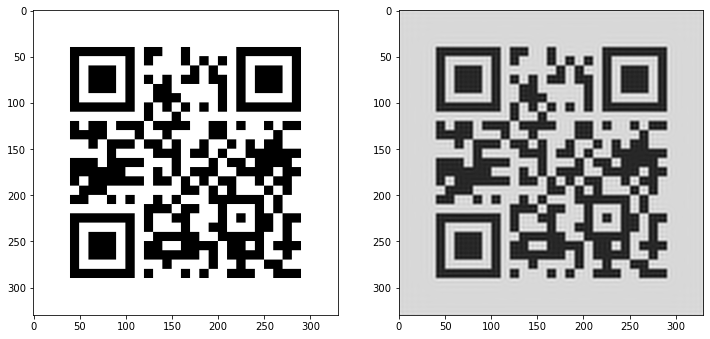

In [100]:
print("Alpha = {}, tol = {}, num_steps = {}".format(alpha, tol, num_steps))
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(x, cmap='gray')
axs[1].imshow(restored.reshape(n, n), cmap='gray')

In [102]:
y_blur = []
infos = []
alpha = [0.1, 0.01, 0.001]

x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
x_vec = x.reshape(-1)

for item in alpha:
    T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, item))
    y = T.matvec(x_vec)
    cur_inf = []
    for tol in tols:
        x_dec, num_iters = cg_solv(T, y, tol=tol)
        rel_err = np.linalg.norm(x_vec - x_dec) / np.linalg.norm(x_vec)
        print(item, tol, rel_err)
        cur_inf.append([item, tol, num_iters, rel_err])
        
    infos.append(cur_inf)
    y_blur.append(y)

0.1 0.001 0.12847145208381022
0.1 0.0001 0.10191431361087873
0.1 1e-05 0.09586763786279988
0.1 1e-06 0.07218309739575973
0.1 1e-07 0.06671728068209248
0.01 0.001 0.21519193091811603
0.01 0.0001 0.2019391614730172
0.01 1e-05 0.19717954501824417
0.01 1e-06 0.19489768432182564
0.01 1e-07 0.1888904205220734
0.001 0.001 0.4362717966163371
0.001 0.0001 0.4193894446012745
0.001 1e-05 0.4000683164745951
0.001 1e-06 0.3809347361256462
0.001 1e-07 0.3707964880755362


In [104]:
infos = np.array(infos)
for item in infos:
    print("Alpha = {}".format(item[0, 0]))
    for entry in item:
        print("Tolerance: {}, number of iterations: {:.0f}, relative error: {:.4f}".format(entry[1], entry[2], entry[3]))

Alpha = 0.1
Tolerance: 0.001, number of iterations: 11, relative error: 0.1285
Tolerance: 0.0001, number of iterations: 46, relative error: 0.1019
Tolerance: 1e-05, number of iterations: 136, relative error: 0.0959
Tolerance: 1e-06, number of iterations: 788, relative error: 0.0722
Tolerance: 1e-07, number of iterations: 2425, relative error: 0.0667
Alpha = 0.01
Tolerance: 0.001, number of iterations: 18, relative error: 0.2152
Tolerance: 0.0001, number of iterations: 53, relative error: 0.2019
Tolerance: 1e-05, number of iterations: 168, relative error: 0.1972
Tolerance: 1e-06, number of iterations: 555, relative error: 0.1949
Tolerance: 1e-07, number of iterations: 2832, relative error: 0.1889
Alpha = 0.001
Tolerance: 0.001, number of iterations: 13, relative error: 0.4363
Tolerance: 0.0001, number of iterations: 51, relative error: 0.4194
Tolerance: 1e-05, number of iterations: 160, relative error: 0.4001
Tolerance: 1e-06, number of iterations: 494, relative error: 0.3809
Tolerance:

The matrix $T$ is probably ill-conditioned. The smaller $\alpha$ becomes, the closer the expression in the exponent to zero is. As there is a multiplication by $\alpha$ before the exponent, up to machine precision the entries of the matrix $T$ are becoming the closer to each other, the smaller $\alpha$ is. Matrix $T$ becomes more like a singular matrix so the convergence of the numerical algorithm starts to differ for different $\alpha$.

Thus, for different values of $\alpha$ we converge to different solutions.

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [37]:
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
alpha = 0.01
x_vec = x.reshape(-1)

np.random.seed(133)

T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
y = T.matvec(x_vec)

y = y + np.random.randn(n*n)

x_dec, num_iters = cg_solv(T, y, tol=1e-5, maxiter=2e3)

In [38]:
print("Relative error: {:.4f}".format(np.linalg.norm(x_vec - x_dec) / np.linalg.norm(x_vec)))
print("Iterations run: {:.0f}".format(num_iters))

Relative error: 5768753.6304
Iterations run: 2000


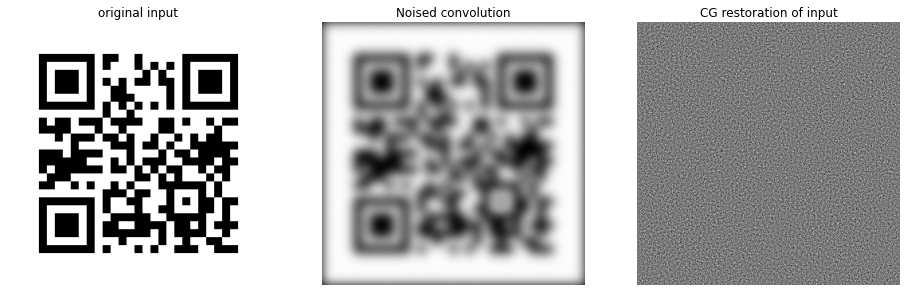

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs[0].imshow(x, cmap="gray")
axs[0].set_title("original input")

axs[1].imshow(y.reshape(n,n), cmap='gray')
axs[1].set_title("Noised convolution")

axs[2].imshow(x_dec.reshape(n,n), cmap='gray')
axs[2].set_title("CG restoration of input")
for item in axs:
    item.axis('off')

So yeah, no convergence and output is a mess. 

Let's look at the conjugate gradients algorithm to see what might be happening here. 

Let $x_0$ be th initial guess, then we obtain $r_0 = \hat{y} - Tx_0, \ p_0 = r_0$. 

As we have constructed $\hat{y} = y + w, \ w \sim \mathcal{N}(0,1)$, then $r_0, p_0 \sim \mathcal{N}(\mu, 1)$, where $\mu$ is the mean determined by $y - Tx_0$. Proceeding with the algorithm the values of $\alpha_k, \ \beta_k$ will be random with some probability distribtuion, so the directions and step lengths of conjugate gradients are random. Thus, it's very unlikely that the method will converge to something meaningful.

Maybe we can use some technique to make the random "walk" part of each iteration small. So locally the algorithm will make random steps due to the presence of the noise, but globally each iteration will move deterministically to converge to something meaningfull. The problem is that the obtained solution can be biased in comparison to the original $x$.

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [11]:
def T_lmbda_matvec(x, alpha, lmbda):
    assert(len(x.shape) == 1)
    n = np.int(np.sqrt(len(x)))
    x = x.reshape(n, n)
    
    base = np.r_[np.exp(-alpha * np.arange(n)**2), 0, np.exp(-alpha * np.arange(-n+1, 0, 1)**2)]
    T_fft = np.outer(base, base)
    T_fft = alpha * T_fft / np.pi
    T_fft[0, 0] += lmbda**2
    
    x_pad = np.zeros(T_fft.shape)
    x_pad[:n, :n] = x
    
    y_pad = np.fft.ifft2(np.fft.fft2(T_fft) * np.fft.fft2(x_pad))
    y_out = y_pad[:n, :n].real

    return y_out.reshape(-1)

In [12]:
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]

alpha = 0.01
lmbdas = [10, 1, 0.1]
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

#noise = np.random.randn(n*n)
x_vec = x.reshape(-1)

infos = []
y_blur = []

for item in lmbdas:
    T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, item))
    y = T.matvec(x_vec)
    cur_inf = []
    for tol in tols:
        x_dec, num_iters = cg_solv(T, y, tol=tol)
        rel_err = np.linalg.norm(x_vec - x_dec) / np.linalg.norm(x_vec)
        print(item, tol, rel_err)
        cur_inf.append([item, tol, num_iters, rel_err])
        
    infos.append(cur_inf)
    y_blur.append(y)

10 0.001 6.383297050851858e-06
10 0.0001 6.383297050851858e-06
10 1e-05 6.383297050851858e-06
10 1e-06 1.796745083051933e-08
10 1e-07 1.796745083051933e-08
1 0.001 0.0008695349520350474
1 0.0001 2.6233450297802295e-05
1 1e-05 4.162276309580823e-06
1 1e-06 7.452012058932949e-07
1 1e-07 1.2466899200761121e-07
0.1 0.001 0.017420345576088524
0.1 0.0001 0.0016838464324931259
0.1 1e-05 0.00016169082150333853
0.1 1e-06 1.6982572724211485e-05
0.1 1e-07 1.8001733057469905e-06


In [13]:
infos = np.array(infos)
for item in infos:
    print("Lambda = {}".format(item[0, 0]))
    for entry in item:
        print("Tolerance: {}, number of iterations: {:.0f}, relative error: {:.8f}".format(entry[1], entry[2], entry[3]))

Lambda = 10.0
Tolerance: 0.001, number of iterations: 2, relative error: 0.00000638
Tolerance: 0.0001, number of iterations: 2, relative error: 0.00000638
Tolerance: 1e-05, number of iterations: 2, relative error: 0.00000638
Tolerance: 1e-06, number of iterations: 3, relative error: 0.00000002
Tolerance: 1e-07, number of iterations: 3, relative error: 0.00000002
Lambda = 1.0
Tolerance: 0.001, number of iterations: 4, relative error: 0.00086953
Tolerance: 0.0001, number of iterations: 6, relative error: 0.00002623
Tolerance: 1e-05, number of iterations: 7, relative error: 0.00000416
Tolerance: 1e-06, number of iterations: 8, relative error: 0.00000075
Tolerance: 1e-07, number of iterations: 9, relative error: 0.00000012
Lambda = 0.1
Tolerance: 0.001, number of iterations: 19, relative error: 0.01742035
Tolerance: 0.0001, number of iterations: 30, relative error: 0.00168385
Tolerance: 1e-05, number of iterations: 41, relative error: 0.00016169
Tolerance: 1e-06, number of iterations: 52, 

Now the convergence is faster and the quality of the obtain solution is better. Tikhonov regularization makes the matrix $T$ well-conditioned, so the problem with $T$ is indeed in its ill-conditionness. 

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

We may forst note that the matrix $T$ (and $T_{\lambda}$) is symmetric, so the first row of each block is the same as the first row. 

http://people.maths.ox.ac.uk/wathen/preconditioning.pdf - utilizie the idea of Strang preconditioner for symmetric BTTB matrix from here.

In [65]:
def C_matvec(x, alpha, lmbda):
    assert(len(x.shape) == 1)
    n = np.int(np.sqrt(len(x)))
    x = x.reshape(n, n)
    n_up = n // 2
    n_down = (n-1) // 2
    
    base = np.r_[np.exp(-alpha * np.arange(n_up + 1)**2), np.exp(-alpha * np.arange(-n_down, 0)**2)]
    C_fft = np.outer(base, base)
    C_fft = alpha * C_fft / np.pi
    C_fft[0, 0] += lmbda**2
    
    y_pad = np.fft.ifft2(np.fft.fft2(x) * np.fft.fft2(C_fft))
    
    y_out = y_pad.real
    
    return y_out.reshape(-1)

def C_inv_matvec(x, alpha, lmbda):
    assert(len(x.shape) == 1)
    n = np.int(np.sqrt(len(x)))
    x = x.reshape(n, n)
    n_up = n // 2
    n_down = (n-1) // 2
    
    base = np.r_[np.exp(-alpha * np.arange(n_up + 1)**2), np.exp(-alpha * np.arange(-n_down, 0)**2)]
    C_fft = np.outer(base, base)
    C_fft = alpha * C_fft / np.pi
    C_fft[0, 0] += lmbda**2
    
    #from convolution theorem multiplication C^{-1}x can be easily computed be the formula below
    y_pad = np.fft.ifft2(np.fft.fft2(x) / np.fft.fft2(C_fft))
    
    y_out = y_pad.real
    
    return y_out.reshape(-1)

4.5395296475384024e-11


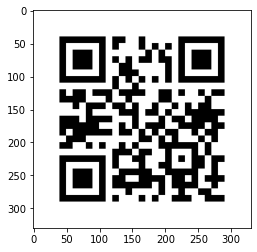

In [66]:
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
x_vec = x.reshape(-1)

alpha = 0.01
lmbda = 1

out = C_matvec(x_vec, alpha, lmbda)
x_ = C_inv_matvec(out, alpha, lmbda)

print(np.linalg.norm(x_vec - x_))

plt.imshow(x_.reshape(n, n), cmap="gray")

Here I've just checked that my function computes exactly the $C^{-1}x$

In [17]:
import scipy.linalg

In [67]:
alpha = 0.01
lmbda = 1
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
x_vec = x.reshape(-1)

T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lmbda))
C1 = spla.LinearOperator((n**2, n**2), matvec = lambda x : C_inv_matvec(x, alpha, lmbda))

y = T.matvec(x_vec)
cy = C1.matvec(y)

In [76]:
def cg_solv_prec(T, prec, y, tol, maxiter=None):
    num_iters = 0
    
    def num_it(xk):
        nonlocal num_iters
        num_iters += 1
        
    x_dec, _ = spla.cg(T, y, tol=tol, M=prec, callback=num_it, maxiter=maxiter)
    
    return x_dec, num_iters


tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

x_dec, num_iters = cg_solv_prec(T, C1, y, tol=1e-3, maxiter=200)

In [77]:
print(np.linalg.norm(x_dec - x_vec) / np.linalg.norm(x_vec), num_iters)

0.0003550459605659064 3


In [78]:
infos = []
for tol in tols:
    x_dec, num_iters = cg_solv_prec(T, C1, y, tol=tol)
    infos.append([num_iters, np.linalg.norm(x_vec - x_dec) / np.linalg.norm(x_vec)])

In [79]:
print('Lambda = {}\nAlpha = {}'.format(lmbda, alpha))
infos = np.array(infos)
for item, tol in zip(infos, tols):
    print("Tolerance: {}, number of iterations: {:.0f}, relative error: {:.8f}".format(tol, item[0], item[1]))

Lambda = 1
Alpha = 0.01
Tolerance: 0.001, number of iterations: 3, relative error: 0.00035505
Tolerance: 0.0001, number of iterations: 4, relative error: 0.00000725
Tolerance: 1e-05, number of iterations: 4, relative error: 0.00000725
Tolerance: 1e-06, number of iterations: 5, relative error: 0.00000029
Tolerance: 1e-07, number of iterations: 6, relative error: 0.00000002


We see that preconditioning decreases the number of iterations for convergence and slightly decreses the relative error. Preconditioning decreases the condition number, so together with Tikhonov regularization we kind of solve the problem of huge condition number of $T$.